In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
data=pd.read_csv("C:\\Users\\nikhi\\Downloads\\Linear_train.csv")
data
data_test=pd.read_csv("C:\\Users\\nikhi\\Downloads\\Linear_test.csv")
data_test

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,L,M,N,O,P,Q,R,S,T,label
0,0,40.790740,1187.897579,-28.941991,43.498302,14.157983,2536.000797,-34.181638,-14.940211,4746.739893,...,707.727094,21.030812,-44.606156,-9.625546,42.276162,-11.000471,-19.830564,-5.529430,-28.154864,-163.522723
1,1,47.968749,1498.588679,24.922821,-38.979082,16.405452,1798.950305,-23.660484,-34.792328,4076.982013,...,737.135391,-17.860346,42.274026,-19.886483,16.337922,9.025313,27.760845,21.484409,-24.206545,6484.664510
2,2,9.762564,1316.354415,1.170771,10.365178,-11.993156,2714.382200,26.382837,27.442924,4178.719984,...,940.732329,-35.879432,23.837924,3.729191,33.564390,12.848880,-45.837834,-49.592176,36.688611,2393.818082
3,3,6.414629,1895.586749,44.496934,-49.677800,-24.825833,2327.316373,1.406644,44.103008,4586.697737,...,925.441952,-19.409771,25.346975,-7.729920,-42.813516,-17.666168,35.506064,-49.048652,-34.048583,-9397.072355
4,4,-4.112012,1130.920162,19.103960,-8.741503,-28.589701,1299.418975,42.946135,4.758032,4809.536369,...,797.953813,-46.788081,43.876292,34.009303,34.061089,-30.182903,-41.188733,26.828040,-22.476663,10487.323575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,-37.802773,1204.712095,30.916166,-32.185868,-1.860028,1515.265232,-43.103776,12.911176,4865.716464,...,877.773521,-14.401216,-1.152501,9.371124,-16.953167,5.590761,27.769178,-42.025878,-46.347044,-7526.092452
9996,9996,21.841410,1067.350891,-9.598592,13.545191,2.910106,1286.431551,-49.542330,27.868152,4513.212740,...,518.544504,-4.202304,-6.779170,2.384596,20.661830,-7.804846,-3.170458,39.886812,-17.630468,6133.716734
9997,9997,-34.734278,1630.673420,27.359399,-0.718695,-24.225154,1309.956055,36.839488,-40.966273,4747.087919,...,948.924788,-31.628023,-5.662373,-45.441406,-33.063193,-23.153715,-7.089845,-25.366712,47.034834,-1404.204034
9998,9998,-30.752354,1610.117693,-37.652326,-46.959112,18.151935,2489.587758,-33.802220,-11.550250,4912.443446,...,656.905027,-48.696117,-20.709813,-27.404294,14.174336,40.169075,37.329627,-27.968720,-18.475040,1972.371711


Text(0, 0.5, 'cost')

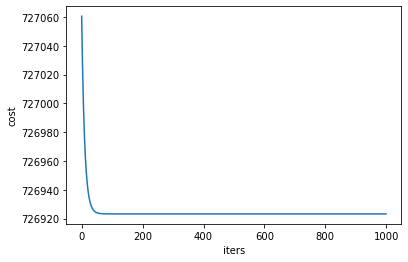

In [3]:
#Linear_regression

y=data.loc[:,"label"]
x=data.drop(['Unnamed: 0','label'], axis=1)
#Normalisation
def normx(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    value=(x-mean)/std
    return value
x=normx(x)
m=len(x)
x=np.c_[np.ones(m), x]
theta=np.zeros(x.shape[1])

def hypothesis(x,theta):
    htheta=np.dot(x,theta)
    return htheta
def cost_function(x,y,theta):
    htheta=hypothesis(x,theta)
    cost=(1/(2*m))*(np.sum(np.square(htheta-y)))
    return cost
def gradientdescent(x,y,theta,alpha,iters):
    m=len(y)
    theta=np.zeros(x.shape[1])
    cost_arr=[]
    for i in range(iters):
        cost=cost_function(x,y,theta)
        htheta=hypothesis(x,theta)
        dcost=(1/m)*(np.dot(x.T,htheta-y))
        theta=theta-alpha*dcost
        cost_arr.append(cost)
    return theta,cost_arr
iters=1000
alpha=0.05
[theta,cost_arr]=gradientdescent(x,y,theta,alpha,iters)
plt.plot(cost_arr)
max_x=np.max(x)
plt.xlabel('iters')
plt.ylabel('cost')



In [11]:
#Accuracy
X_test=data_test.drop(['Unnamed: 0','label'], axis=1)
Y_test=data_test.loc[:,'label']
X_test=(X_test-X_test.mean())/X_test.std()
M=len(X_test)
X_test=np.c_[np.ones(M), X_test]
y_pred=hypothesis(X_test,theta)
r2=r2_score(y_pred,Y_test)
Accuracy=r2*100
print(Accuracy)

99.97711745389492
